In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('cleaned_data.csv')
df = df.drop(['Unnamed: 0','Title'],axis=1)

In [3]:
df['avg_review'] = df['Rating']/df['No. Reviews']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         626 non-null    float64
 1   No. Reviews   626 non-null    int64  
 2   Display size  626 non-null    float64
 3   Storage type  626 non-null    object 
 4   CPU Speed     626 non-null    float64
 5   RAM           626 non-null    int64  
 6   Rating        626 non-null    float64
 7   Brand         626 non-null    object 
 8   graphics      626 non-null    int64  
 9   Processor     626 non-null    object 
 10  avg_review    626 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 53.9+ KB


### Getting Dummies for Categorical features

In [5]:
df = pd.get_dummies(data = df)
df.columns

Index(['Price', 'No. Reviews', 'Display size', 'CPU Speed', 'RAM', 'Rating',
       'graphics', 'avg_review', 'Storage type_EMMC',
       'Storage type_Flash Memory Solid State', 'Storage type_HDD',
       'Storage type_Others', 'Storage type_SATA', 'Storage type_SSD',
       'Brand_acer', 'Brand_apple', 'Brand_asus', 'Brand_dell', 'Brand_hp',
       'Brand_lenovo', 'Brand_other_brand', 'Processor_amd', 'Processor_i3',
       'Processor_i5', 'Processor_i7', 'Processor_i9', 'Processor_unknown'],
      dtype='object')

### Importing Necessary libraries

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler

### Creating train test split for our model

In [7]:
X = df.drop('Price',axis=1)
y = df.Price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
def get_metrics(model):
    y_pred = model.predict(X_test)
    print("The R2 score : ", r2_score(y_test,y_pred))
    print("The mean Absoulte error : ", mean_absolute_error(y_test,y_pred))

### Multiple Linear Regression

In [9]:
linreg = LinearRegression().fit(X_train,y_train)

get_metrics(linreg)

The R2 score :  0.6887339590830781
The mean Absoulte error :  233.51659556686067


### Lets scale the data for Lasso

In [10]:
# Lets scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Lasso Regression

In [11]:
lasso = Lasso(alpha=0.1,max_iter = 10000).fit(X_train,y_train)

get_metrics(lasso)

The R2 score :  0.6889202613723395
The mean Absoulte error :  233.41759828553663


### Finding the best value for alpha

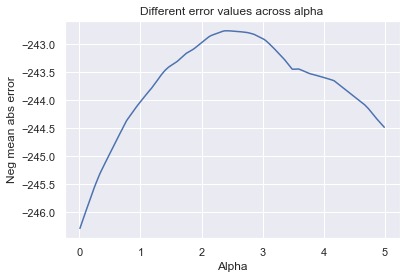

In [12]:
alpha = []
error = []
for i in range(1,500):
    alpha.append(i/100)
    lasso = Lasso(alpha=i/100, max_iter=10000)
    error.append(cross_val_score(lasso, X, y, scoring = 'neg_mean_absolute_error', cv=5).mean())
plt.title("Different error values across alpha")
plt.xlabel("Alpha")
plt.ylabel('Neg mean abs error')
plt.plot(alpha,error)
plt.show()

In [13]:
best_alpha = alpha[np.argmax(error)]
print("Best alpha value for Lasso: ",best_alpha)

lasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train,y_train)
get_metrics(lasso)

Best alpha value for Lasso:  2.43
The R2 score :  0.6933245137015283
The mean Absoulte error :  231.67924307854318


### Random Forest Regressor

In [14]:
rf = RandomForestRegressor(random_state=1).fit(X_train,y_train)
get_metrics(rf)

The R2 score :  0.8112318361471794
The mean Absoulte error :  144.1289568278914


### Hyper parameter tuning

In [15]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [24]:
model_params = {
    'n_estimators': [50, 150, 250,300,350,400 ,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,4,5,6, None],
    'min_samples_split': [2, 4, 6 ,8,10],
    'bootstrap': [True, False]
}

In [30]:
rf_model = RandomForestRegressor(random_state=1)
clf = GridSearchCV(rf_model, model_params , verbose = 2 ,cv=3)
model = clf.fit(X_train, y_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=50, total=   0.0s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  

[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250 
[CV] 

[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.4s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_spl

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_spl

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_sp

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_sp

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_s

[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_sp

[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=log2, min_samples_sp

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=auto, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=sqrt, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=2, max_features=log2, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=log2, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=log2, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=log2, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=auto, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=4, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, min_samples_split=8, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=2, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=6, n_estimators=

[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=6, max_features=log2, min_samples_split=10, n_e

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=4, n_estimators=250, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_s

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_split=8, n_estimators=250, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=6, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=s

[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_

[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=150, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=False, max_depth=None, max_features=log2, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=log2, min_

[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed: 17.2min finished


In [37]:
model.best_params_

get_metrics(model)

The R2 score :  0.8334850496250902
The mean Absoulte error :  139.14715248226952


In [34]:
import pickle

pkl_filename = "best_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)